___

# Forecast the Queen of the Stock Market: VIX
___
<center><em>Copyright Alexander Novak</em></center>
<center><em>For more information, visit me at <a href='https://www.linkedin.com/in/alexander-novak-a6ba179'>LinkedIn</a></em></center>

## Some Related Work (Literature)

Literature:
https://core.ac.uk/download/pdf/14912922.pdf

Result: LSTMs are the best:
https://scholar.smu.edu/cgi/viewcontent.cgi?article=1052&context=datasciencereview

Finally considering Ploynomial Regression?
https://towardsdatascience.com/polynomial-regression-bbe8b9d97491


----------------

# Part (I) - Get and prepare data

----------------

### Python library imports to fetch and prepare data

In [1]:
# Import Pandas Datareader for financial data
import pandas_datareader as pdr
import pandas as pd
import datetime
import numpy as np
%matplotlib inline

#### Ignore simple warnings

In [2]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

-------------------------

## == Main Timeseries 1 == : VIX Values

<div class="alert alert-info">
<h3>For Further Reading:</h3>
<strong>
<a href='https://en.wikipedia.org/wiki/VIX'>Wikipedia</a></strong>&nbsp;&nbsp;<font color=black>VIX Index</font><br>
</div>

### Import VIX historical prices

In [53]:
# Load historical VIX data for VIX, starting from 02.01.1990. 
df_vix_orig = pdr.get_data_yahoo('^VIX', start=datetime.datetime(1990, 1, 2), end=datetime.datetime(2019, 11, 15))

# Drop columns
df_vix_orig.drop(['Adj Close', 'Volume'], axis = 1, inplace = True)

# Set Labels
#def get_vix_label(vix_val):
#    if vix_val > 0 and vix_val <=10:
#        return int(0)
#    elif vix_val > 10 and vix_val <=20:
#        return int(1)
#    elif vix_val > 20 and vix_val <=30:
#        return int(2)
#    elif vix_val > 30 and vix_val <=40:
#        return int(3)
#    elif vix_val > 40 and vix_val <=50:
#        return int(4)
#    elif vix_val > 50 and vix_val <=60:
#        return int(5)
#    elif vix_val > 60 and vix_val <=70:
#        return int(6)
#    elif vix_val > 70 and vix_val <=80:
#        return int(7)
#    elif vix_val > 80 and vix_val <=90:
#        return int(8)
#    elif vix_val > 90 and vix_val <=100:
#        return int(9)
def get_vix_label(vix_val):
    if vix_val >= 0 and vix_val <=4:
        return int(0)
    elif vix_val >= 5 and vix_val < 10:
        return int(1)
    elif vix_val >= 10 and vix_val < 15:
        return int(2)
    elif vix_val >= 15 and vix_val < 20:
        return int(3)
    elif vix_val >= 20 and vix_val < 25:
        return int(4)
    elif vix_val >= 25 and vix_val < 30:
        return int(5)
    elif vix_val >= 30 and vix_val < 35:
        return int(6)
    elif vix_val >= 35 and vix_val < 40:
        return int(7)
    elif vix_val >= 40 and vix_val < 45:
        return int(8)
    elif vix_val >= 45 and vix_val < 50:
        return int(9)
    elif vix_val >= 50 and vix_val < 55:
        return int(10)
    elif vix_val >= 55 and vix_val < 60:
        return int(11)
    elif vix_val >= 60 and vix_val < 65:
        return int(12)
    elif vix_val >= 65 and vix_val < 70:
        return int(13)
    elif vix_val >= 70 and vix_val < 75:
        return int(14)
    elif vix_val >= 75 and vix_val < 80:
        return int(15)
    elif vix_val >= 80 and vix_val < 85:
        return int(16)
    elif vix_val >= 85 and vix_val < 90:
        return int(17)
    elif vix_val >= 90 and vix_val < 95:
        return int(18)
    elif vix_val >= 95 and vix_val < 100:
        return int(19)
    elif vix_val >= 100 and vix_val <=110:
        return int(20)

df_vix_orig['VIX_label'] = df_vix_orig['Close'].apply(lambda x: get_vix_label(x))

# Print the first 5 records
print(df_vix_orig.head(200))

                 High        Low       Open      Close  VIX_label
Date                                                             
1990-01-02  17.240000  17.240000  17.240000  17.240000          3
1990-01-03  18.190001  18.190001  18.190001  18.190001          3
1990-01-04  19.219999  19.219999  19.219999  19.219999          3
1990-01-05  20.110001  20.110001  20.110001  20.110001          4
1990-01-08  20.260000  20.260000  20.260000  20.260000          4
...               ...        ...        ...        ...        ...
1990-10-09  30.709999  30.709999  30.709999  30.709999          6
1990-10-10  31.190001  31.190001  31.190001  31.190001          6
1990-10-11  33.980000  33.980000  33.980000  33.980000          6
1990-10-12  31.940001  31.940001  31.940001  31.940001          6
1990-10-15  31.639999  31.639999  31.639999  31.639999          6

[200 rows x 5 columns]


#### Plot VIX based on Closed Data

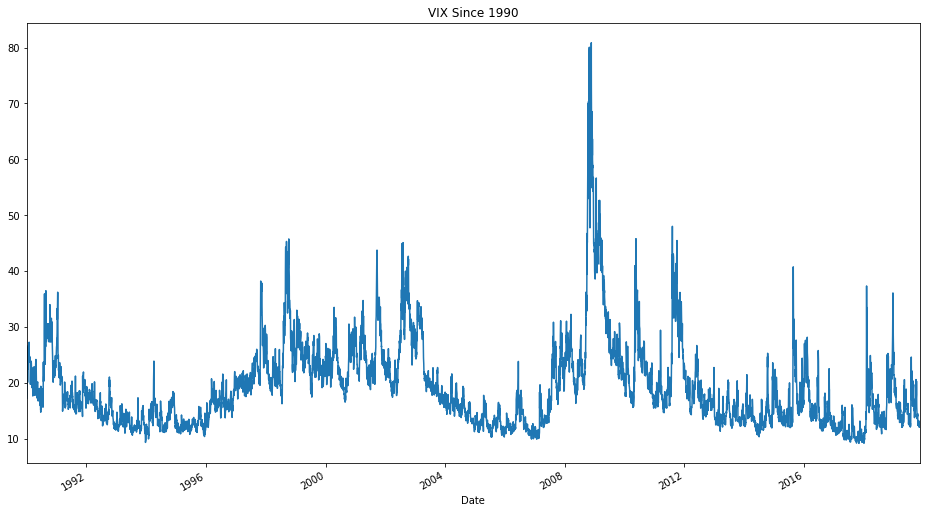

In [54]:
# Plot VIX based on Closed Data
df_vix_orig['Close'].plot(figsize=(16,9), title='VIX Since 1990');

#### Calculate daily percentage change (daily returns) on the close prices.

In [55]:
# Calculate the percentage change (daily returns)
df_vix_orig['VIX_Close_Pct_Change'] = df_vix_orig['Close'].pct_change(1)
df_vix_orig['VIX_Close_Pct_Change_minus_2d'] = df_vix_orig['Close'].pct_change(2)
df_vix_orig['VIX_Close_Pct_Change_minus_3d'] = df_vix_orig['Close'].pct_change(3)
df_vix_orig['VIX_Close_Pct_Change_minus_4d'] = df_vix_orig['Close'].pct_change(4)
df_vix_orig['VIX_Close_Pct_Change_minus_5d'] = df_vix_orig['Close'].pct_change(5)

# Print the first 5 records
df_vix_orig.head(7)

,High,Low,Open,Close,VIX_label,VIX_Close_Pct_Change,VIX_Close_Pct_Change_minus_2d,VIX_Close_Pct_Change_minus_3d,VIX_Close_Pct_Change_minus_4d,VIX_Close_Pct_Change_minus_5d
Date,,,,,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,3,NaN,NaN,NaN,NaN,NaN
1990-01-03,18.190001,18.190001,18.190001,18.190001,3,0.055104,NaN,NaN,NaN,NaN
1990-01-04,19.219999,19.219999,19.219999,19.219999,3,0.056624,0.114849,NaN,NaN,NaN
1990-01-05,20.110001,20.110001,20.110001,20.110001,4,0.046306,0.105553,0.166473,NaN,NaN
1990-01-08,20.260000,20.260000,20.260000,20.260000,4,0.007459,0.054110,0.113799,0.175174,NaN
1990-01-09,22.200001,22.200001,22.200001,22.200001,4,0.095755,0.103928,0.155047,0.220451,0.287703
1990-01-10,22.440001,22.440001,22.440001,22.440001,4,0.010811,0.107601,0.115863,0.167534,0.233645


#### Plot VIX daily returns

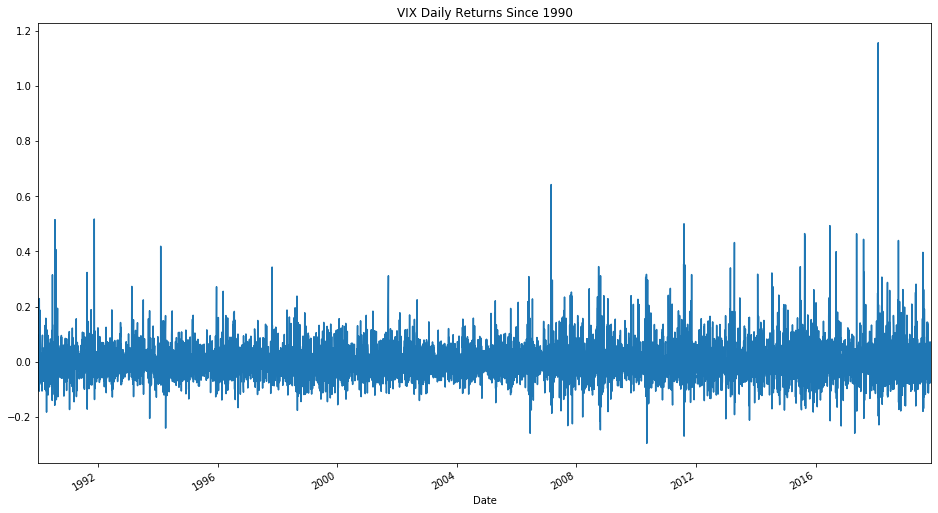

In [56]:
# Plot VIX daily returns 
df_vix_orig['VIX_Close_Pct_Change'].plot(figsize=(16,9), title='VIX Daily Returns Since 1990');

#### Visualize

In [57]:
# Adding columns with future values using them as features
df_vix_orig['Close_t_plus_5'] = df_vix_orig['Close'].shift(-4)
df_vix_orig['Close_t_plus_10'] = df_vix_orig['Close'].shift(-9)
df_vix_orig['Close_t_plus_15'] = df_vix_orig['Close'].shift(-14)
df_vix_orig['Close_t_plus_20'] = df_vix_orig['Close'].shift(-19)

df_vix_orig['VIX_label_t_minus_5'] = df_vix_orig['VIX_label'].shift(5)
df_vix_orig['VIX_label_t_plus_5'] = df_vix_orig['VIX_label'].shift(-4)
df_vix_orig['VIX_label_t_minus_10'] = df_vix_orig['VIX_label'].shift(10)


df_vix_orig.head(11)

,High,Low,Open,Close,VIX_label,VIX_Close_Pct_Change,VIX_Close_Pct_Change_minus_2d,VIX_Close_Pct_Change_minus_3d,VIX_Close_Pct_Change_minus_4d,VIX_Close_Pct_Change_minus_5d,Close_t_plus_5,Close_t_plus_10,Close_t_plus_15,Close_t_plus_20,VIX_label_t_minus_5,VIX_label_t_plus_5,VIX_label_t_minus_10
Date,,,,,,,,,,,,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,3,NaN,NaN,NaN,NaN,NaN,20.260000,26.340000,26.700001,26.440001,NaN,4.0,NaN
1990-01-03,18.190001,18.190001,18.190001,18.190001,3,0.055104,NaN,NaN,NaN,NaN,22.200001,24.180000,24.719999,27.250000,NaN,4.0,NaN
1990-01-04,19.219999,19.219999,19.219999,19.219999,3,0.056624,0.114849,NaN,NaN,NaN,22.440001,24.160000,25.389999,25.360001,NaN,4.0,NaN
1990-01-05,20.110001,20.110001,20.110001,20.110001,4,0.046306,0.105553,0.166473,NaN,NaN,20.049999,24.340000,25.629999,24.870001,NaN,4.0,NaN
1990-01-08,20.260000,20.260000,20.260000,20.260000,4,0.007459,0.054110,0.113799,0.175174,NaN,24.639999,22.500000,26.280001,24.320000,NaN,4.0,NaN
1990-01-09,22.200001,22.200001,22.200001,22.200001,4,0.095755,0.103928,0.155047,0.220451,0.287703,26.340000,26.700001,26.440001,24.540001,3.0,5.0,NaN
1990-01-10,22.440001,22.440001,22.440001,22.440001,4,0.010811,0.107601,0.115863,0.167534,0.233645,24.180000,24.719999,27.250000,24.690001,3.0,4.0,NaN
1990-01-11,20.049999,20.049999,20.049999,20.049999,4,-0.106506,-0.096847,-0.010365,-0.002984,0.043184,24.160000,25.389999,25.360001,24.290001,3.0,4.0,NaN
1990-01-12,24.639999,24.639999,24.639999,24.639999,4,0.228928,0.098039,0.109910,0.216189,0.225261,24.340000,25.629999,24.870001,23.770000,4.0,4.0,NaN


### Add Column: VIX High Low Range

In [58]:
# Add additional column for later use: Range between highest and lowest value
df_vix_orig['VIX_High_Low_Range'] = df_vix_orig['High'] - df_vix_orig['Low']

# Rename columns
df_vix_orig.rename(columns={"Open": "VIX_Open", 
                            "High": "VIX_High", 
                            "Low": "VIX_Low", 
                            "Close": "VIX_Close"}, inplace = True)

df_vix_orig["VIX_Close_Minus_1"] = df_vix_orig["VIX_Close"].shift(1)
df_vix_orig["VIX_Close_Minus_2"] = df_vix_orig["VIX_Close"].shift(2)
df_vix_orig["VIX_Close_Minus_3"] = df_vix_orig["VIX_Close"].shift(3)
df_vix_orig["VIX_Close_Minus_4"] = df_vix_orig["VIX_Close"].shift(4)
df_vix_orig["VIX_Close_Minus_5"] = df_vix_orig["VIX_Close"].shift(5)

# Print the first 5 records of the dataframe
df_vix_orig.head(6)

,VIX_High,VIX_Low,VIX_Open,VIX_Close,VIX_label,VIX_Close_Pct_Change,VIX_Close_Pct_Change_minus_2d,VIX_Close_Pct_Change_minus_3d,VIX_Close_Pct_Change_minus_4d,VIX_Close_Pct_Change_minus_5d,...,Close_t_plus_20,VIX_label_t_minus_5,VIX_label_t_plus_5,VIX_label_t_minus_10,VIX_High_Low_Range,VIX_Close_Minus_1,VIX_Close_Minus_2,VIX_Close_Minus_3,VIX_Close_Minus_4,VIX_Close_Minus_5
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,3,NaN,NaN,NaN,NaN,NaN,...,26.440001,NaN,4.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1990-01-03,18.190001,18.190001,18.190001,18.190001,3,0.055104,NaN,NaN,NaN,NaN,...,27.250000,NaN,4.0,NaN,0.0,17.240000,NaN,NaN,NaN,NaN
1990-01-04,19.219999,19.219999,19.219999,19.219999,3,0.056624,0.114849,NaN,NaN,NaN,...,25.360001,NaN,4.0,NaN,0.0,18.190001,17.240000,NaN,NaN,NaN
1990-01-05,20.110001,20.110001,20.110001,20.110001,4,0.046306,0.105553,0.166473,NaN,NaN,...,24.870001,NaN,4.0,NaN,0.0,19.219999,18.190001,17.240000,NaN,NaN
1990-01-08,20.260000,20.260000,20.260000,20.260000,4,0.007459,0.054110,0.113799,0.175174,NaN,...,24.320000,NaN,4.0,NaN,0.0,20.110001,19.219999,18.190001,17.240000,NaN
1990-01-09,22.200001,22.200001,22.200001,22.200001,4,0.095755,0.103928,0.155047,0.220451,0.287703,...,24.540001,3.0,5.0,NaN,0.0,20.260000,20.110001,19.219999,18.190001,17.24


-------------

## == Timeseries 2 == : VIX Future Term Structure
### Import VIX Futures historical data (8 Futures contracts).
Source: vixcentral.com

URL: http://vixcentral.com/historical/?days=5000

In [59]:
import os

# Fetch data from a prepared excel (private server) file
try:
    df_vix_futures = pd.read_excel('http://etot.de/temp/vixcentral.xlsx', index_col='Date')
except:
    pd.read_excel(os.path.join('data', 'vixcentral.xlsx'), index_col=0)

# Print the first 5 records of the dataframe
df_vix_futures.head()

,F1,F2,F3,F4,F5,F6,F7,F8
Date,,,,,,,,
2019-11-26,13.875,16.075,17.275,17.575,17.975,18.175,18.325,18.525
2019-11-25,14.075,16.225,17.425,17.725,18.075,18.325,18.425,18.625
2019-11-22,14.775,16.725,17.775,18.075,18.425,18.625,18.750,18.900
2019-11-21,15.325,17.025,17.975,18.275,18.625,18.775,18.875,18.975
2019-11-20,15.175,16.825,17.775,18.075,18.425,18.575,18.675,18.800


### Calculate VIX Futures Term Structure
As seen on vixcentral.com it is significant to see wether VIX futures are in contango or backwardation.

Time Period: October 2017 - 15.11.2019

In [60]:
# VIX Future 2 - VIX Future 1
df_vix_futures['Diff_F2_F1'] = df_vix_futures['F2'] - df_vix_futures['F1']
df_vix_futures['Rel_F2_F1'] = round(df_vix_futures['F2'] / df_vix_futures['F1'] - 1, 4)

# VIX Future 3 - VIX Future 2
df_vix_futures['Diff_F3_F2'] = df_vix_futures['F3'] - df_vix_futures['F2']
df_vix_futures['Rel_F3_F2'] = round(df_vix_futures['F3'] / df_vix_futures['F2'] - 1, 4)

# VIX Future 4 - VIX Future 3
df_vix_futures['Diff_F4_F3'] = df_vix_futures['F4'] - df_vix_futures['F3']
df_vix_futures['Rel_F4_F3'] = round(df_vix_futures['F4'] / df_vix_futures['F3'] - 1, 4)

# VIX Future 5 - VIX Future 4
df_vix_futures['Diff_F5_F4'] = df_vix_futures['F5'] - df_vix_futures['F4']
df_vix_futures['Rel_F5_F4'] = round(df_vix_futures['F5'] / df_vix_futures['F4'] - 1, 4)

# VIX Future 6 - VIX Future 5
df_vix_futures['Diff_F6_F5'] = df_vix_futures['F6'] - df_vix_futures['F5']
df_vix_futures['Rel_F6_F5'] = round(df_vix_futures['F6'] / df_vix_futures['F5'] - 1, 4)

# VIX Future 7 - VIX Future 6
df_vix_futures['Diff_F7_F6'] = df_vix_futures['F7'] - df_vix_futures['F6']
df_vix_futures['Rel_F7_F6'] = round(df_vix_futures['F7'] / df_vix_futures['F6'] - 1, 4)

# VIX Future 8 - VIX Future 7
df_vix_futures['Diff_F8_F7'] = df_vix_futures['F8'] - df_vix_futures['F7']
df_vix_futures['Rel_F8_F7'] = round(df_vix_futures['F8'] / df_vix_futures['F7'] - 1, 4)

# Special contango situation: Future 7 to Future 4
df_vix_futures['Cont_F7_F4'] = round(df_vix_futures['F7'] / df_vix_futures['F4'] - 1, 4)

df_vix_futures.head()

,F1,F2,F3,F4,F5,F6,F7,F8,Diff_F2_F1,Rel_F2_F1,...,Rel_F4_F3,Diff_F5_F4,Rel_F5_F4,Diff_F6_F5,Rel_F6_F5,Diff_F7_F6,Rel_F7_F6,Diff_F8_F7,Rel_F8_F7,Cont_F7_F4
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-26,13.875,16.075,17.275,17.575,17.975,18.175,18.325,18.525,2.20,0.1586,...,0.0174,0.40,0.0228,0.20,0.0111,0.150,0.0083,0.200,0.0109,0.0427
2019-11-25,14.075,16.225,17.425,17.725,18.075,18.325,18.425,18.625,2.15,0.1528,...,0.0172,0.35,0.0197,0.25,0.0138,0.100,0.0055,0.200,0.0109,0.0395
2019-11-22,14.775,16.725,17.775,18.075,18.425,18.625,18.750,18.900,1.95,0.1320,...,0.0169,0.35,0.0194,0.20,0.0109,0.125,0.0067,0.150,0.0080,0.0373
2019-11-21,15.325,17.025,17.975,18.275,18.625,18.775,18.875,18.975,1.70,0.1109,...,0.0167,0.35,0.0192,0.15,0.0081,0.100,0.0053,0.100,0.0053,0.0328
2019-11-20,15.175,16.825,17.775,18.075,18.425,18.575,18.675,18.800,1.65,0.1087,...,0.0169,0.35,0.0194,0.15,0.0081,0.100,0.0054,0.125,0.0067,0.0332


-------------------------

## == Timeseries 3 == : VVIX - Volatility of the Volatility
"VIX of VIX Benchmark Index: Provides a Gauge for Measuring Volatility of the VIX Index Itself."

Source: http://ir.cboe.com/press-releases/2012/14-mar-2012a.aspx
### Import historical values of VVIX

In [61]:
# Get historical data of the VVIX from CBOE
df_vvix = pd.read_csv('http://www.cboe.com/publish/scheduledtask/mktdata/datahouse/vvixtimeseries.csv', 
                      header=1, 
                     # skiprows = [0]
                     )

# Reformat Date Column
df_vvix['Date'] = pd.to_datetime(df_vvix.Date)

# Set Date as dataframe index
df_vvix.set_index('Date', inplace=True)

# Historical values
df_vvix["VVIX_Minus_1"] = df_vvix["VVIX"].shift(1)
df_vvix["VVIX_Minus_2"] = df_vvix["VVIX"].shift(2)
df_vvix["VVIX_Minus_3"] = df_vvix["VVIX"].shift(3)
df_vvix["VVIX_Minus_4"] = df_vvix["VVIX"].shift(4)
df_vvix["VVIX_Minus_5"] = df_vvix["VVIX"].shift(5)

# Historical changes
df_vvix['VVIX_Pct_Change'] = df_vvix["VVIX"].pct_change(1)
df_vvix['VVIX_Pct_Change_minus_2d'] = df_vvix["VVIX"].pct_change(2)
df_vvix['VVIX_Pct_Change_minus_3d'] = df_vvix["VVIX"].pct_change(3)
df_vvix['VVIX_Pct_Change_minus_4d'] = df_vvix["VVIX"].pct_change(4)
df_vvix['VVIX_Pct_Change_minus_5d'] = df_vvix["VVIX"].pct_change(5)

# Show the first 5 records of the dataframe
df_vvix.head(6)

,VVIX,VVIX_Minus_1,VVIX_Minus_2,VVIX_Minus_3,VVIX_Minus_4,VVIX_Minus_5,VVIX_Pct_Change,VVIX_Pct_Change_minus_2d,VVIX_Pct_Change_minus_3d,VVIX_Pct_Change_minus_4d,VVIX_Pct_Change_minus_5d
Date,,,,,,,,,,,
2007-01-03,87.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,88.19,87.63,NaN,NaN,NaN,NaN,0.006391,NaN,NaN,NaN,NaN
2007-01-05,90.17,88.19,87.63,NaN,NaN,NaN,0.022452,0.028986,NaN,NaN,NaN
2007-01-08,92.04,90.17,88.19,87.63,NaN,NaN,0.020739,0.043656,0.050325,NaN,NaN
2007-01-09,92.76,92.04,90.17,88.19,87.63,NaN,0.007823,0.028724,0.051820,0.058542,NaN
2007-01-10,93.78,92.76,92.04,90.17,88.19,87.63,0.010996,0.018905,0.040035,0.063386,0.070181


-------------------------

## == Timeseries 4 == : Put/Call Ratio (Total and VIX only)
http://www.cboe.com/data/historical-options-data/volume-put-call-ratios


In [62]:
# VIX Put/Call Ratio: Cboe Volatility Index® (VIX®) Volume and Put/Call Ratios (2-24-2006 to present)
df_vix_pc = pd.read_csv('http://www.cboe.com/publish/scheduledtask/mktdata/datahouse/vixpc.csv', skiprows=[0])

# Reformat Date Column
df_vix_pc['Date'] = pd.to_datetime(df_vix_pc.Date)

# Set Date as index
df_vix_pc.set_index('Date', inplace = True)

# Total Put/Call Ratio from Cboe
df_total_pc = pd.read_csv('http://www.cboe.com/publish/scheduledtask/mktdata/datahouse/totalpc.csv', skiprows=[0,1])

# Set Reformat Date Column
df_total_pc['DATE'] = pd.to_datetime(df_total_pc.DATE)

# Rename DATE column to Date
df_total_pc.rename(columns={"DATE": "Date"}, inplace=True)

# Set Date as index
df_total_pc.set_index('Date', inplace=True)

# Drop columns CALLS, PUTS, TOTAL
df_total_pc.drop(['CALLS', 'PUTS', 'TOTAL'], axis = 1, inplace = True) 

# Show the first 5 records of the dataframe
df_total_pc.tail()

,P/C Ratio
Date,
2019-09-30,1.17
2019-10-01,1.09
2019-10-02,1.27
2019-10-03,1.37
2019-10-04,1.05


-------------------------

## == Timeseries 5 == : S&P 500 Index
### Import historical prices of S&P500

Date
2019-11-11    3087.010010
2019-11-12    3091.840088
2019-11-13    3094.040039
2019-11-14    3096.629883
2019-11-15    3120.459961
Name: SPX_Close, dtype: float64


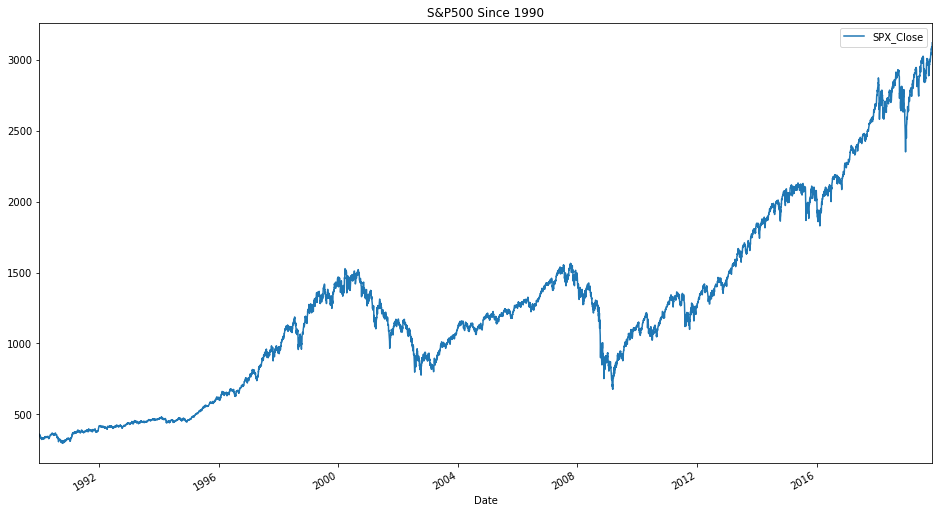

In [63]:
# Get Prices for SP500 from yahoo finance
df_sp500 = pdr.get_data_yahoo('^GSPC', start=datetime.datetime(1990, 1, 2), end=datetime.datetime(2019, 11, 15))

# Drop columns High, Low, Open, Volume, Adj Close
df_sp500.drop(['Adj Close'], axis = 1, inplace = True)

# Calculate the percentage change (daily returns)
df_sp500['SPX_Close_Pct_Change'] = df_sp500['Close'].pct_change()

# There should be only one record with nan value
df_sp500['SPX_Close_Pct_Change'].fillna(0, inplace = True)

# Rename column Close to SPX_Close
df_sp500.rename(columns={'Open': 'SPX_Open', 
                         'High': 'SPX_High',
                         'Low': 'SPX_Low',
                         'Close': 'SPX_Close',
                         'Volume': 'SPX_Volume',
                        }, inplace = True)

# Historical changes
df_sp500['SPX_Pct_Change'] = df_sp500["SPX_Close"].pct_change(1)
df_sp500['SPX_Pct_Change_minus_2d'] = df_sp500["SPX_Close"].pct_change(2)
df_sp500['SPX_Pct_Change_minus_3d'] = df_sp500["SPX_Close"].pct_change(3)
df_sp500['SPX_Pct_Change_minus_4d'] = df_sp500["SPX_Close"].pct_change(4)
df_sp500['SPX_Pct_Change_minus_5d'] = df_sp500["SPX_Close"].pct_change(5)

# Print the first 5 records
print(df_sp500['SPX_Close'].tail())

# Plot the index data
df_sp500[['SPX_Close']].plot(figsize=(16,9), title='S&P500 Since 1990')

In [64]:
df_sp500.head(6)

,SPX_High,SPX_Low,SPX_Open,SPX_Close,SPX_Volume,SPX_Close_Pct_Change,SPX_Pct_Change,SPX_Pct_Change_minus_2d,SPX_Pct_Change_minus_3d,SPX_Pct_Change_minus_4d,SPX_Pct_Change_minus_5d
Date,,,,,,,,,,,
1990-01-02,359.690002,351.980011,353.399994,359.690002,162070000,0.000000,NaN,NaN,NaN,NaN,NaN
1990-01-03,360.589996,357.890015,359.690002,358.760010,192330000,-0.002586,-0.002586,NaN,NaN,NaN,NaN
1990-01-04,358.760010,352.890015,358.760010,355.670013,177000000,-0.008613,-0.008613,-0.011176,NaN,NaN,NaN
1990-01-05,355.670013,351.350006,355.670013,352.200012,158530000,-0.009756,-0.009756,-0.018285,-0.020823,NaN,NaN
1990-01-08,354.239990,350.540009,352.200012,353.790009,140110000,0.004514,0.004514,-0.005286,-0.013853,-0.016403,NaN
1990-01-09,354.170013,349.609985,353.829987,349.619995,155210000,-0.011787,-0.011787,-0.007325,-0.017010,-0.025477,-0.027996


-------------------------

## == Timeseries 6 == : Advanced Decline Issues


Good information about the importance of the NYSE Adv/Decl line and its Divergence:

https://finance.yahoo.com/news/is-advance-decline-line-divergence-a-big-deal-044107242.html

In [65]:
import quandl

# Set quandl key
quandl.ApiConfig.api_key = 'auyuZXohyEtRf5S-BRFn'

# More here: https://www.quandl.com/data/URC-Unicorn-Research-Corporation

# NASDAQ: Number of Stocks with Prices Advancing
nasdaq_df_adv = quandl.get('URC/NASDAQ_ADV', start_date='1990-01-01', end_date='2019-11-15')

# Rename column "Numbers of Stocks" to 'nasdaq_nr_stocks_adv'
nasdaq_df_adv.rename(columns={'Numbers of Stocks': 'nasdaq_nr_stocks_adv'}, inplace = True)

# Calculate the percentage change
nasdaq_df_adv['nasdaq_nr_stocks_adv_pct'] = nasdaq_df_adv['nasdaq_nr_stocks_adv'].pct_change()

# -------------- DECLINE

# NASDAQ: Number of Stocks with Prices Declining
nasdaq_df_decl = quandl.get('URC/NASDAQ_DEC', start_date='1990-01-01', end_date='2019-11-15')

# Rename column "Numbers of Stocks" to 'nasdaq_nr_stocks_adv'
nasdaq_df_decl.rename(columns={'Numbers of Stocks': 'nasdaq_nr_stocks_decl'}, inplace = True)

# Calculate the percentage change
nasdaq_df_decl['nasdaq_nr_stocks_decl_pct'] = nasdaq_df_decl['nasdaq_nr_stocks_decl'].pct_change()

nasdaq_df_decl.head()

,nasdaq_nr_stocks_decl,nasdaq_nr_stocks_decl_pct
Date,,
1990-01-02,822.0,NaN
1990-01-03,787.0,-0.042579
1990-01-04,1051.0,0.335451
1990-01-05,1019.0,-0.030447
1990-01-08,969.0,-0.049068


In [66]:
nasdaq_df_adv.head()

,nasdaq_nr_stocks_adv,nasdaq_nr_stocks_adv_pct
Date,,
1990-01-02,1299.0,NaN
1990-01-03,1349.0,0.038491
1990-01-04,881.0,-0.346924
1990-01-05,972.0,0.103292
1990-01-08,1017.0,0.046296


-------------------------

## == Timeseries 7 == : Cboe 3-Month Volatility Index (VIX3M) www.cboe.com/VIX3M


In [67]:
# Total Put/Call Ratio from Cboe
df_vix3m = pd.read_csv('http://www.cboe.com/publish/scheduledtask/mktdata/datahouse/vix3mdailyprices.csv', 
                       skiprows=[0,1], 
                       index_col=0,
                       parse_dates=True )
# Set Index Name
df_vix3m.index.name = 'Date'

# Rename columns
df_vix3m.rename(columns={"OPEN": "VIX3M_Open", 
                         "HIGH": "VIX3M_High", 
                         "LOW": "VIX3M_Low", 
                         "CLOSE": "VIX3M_Close"}, inplace = True)

#Show first 5 records
df_vix3m.head()

,VIX3M_Open,VIX3M_High,VIX3M_Low,VIX3M_Close
Date,,,,
2007-12-04,24.80,25.01,24.15,24.65
2007-12-05,23.82,23.84,22.91,23.33
2007-12-06,23.43,23.49,20.34,22.10
2007-12-07,21.92,22.32,21.67,22.18
2007-12-10,22.24,22.45,21.70,21.93


-------------------------

## Merge (join) all imported timeseries to one single dataframe

In [68]:
# VIX Futures and Term Structure
df_main_merged = pd.merge(left=df_vix_orig, right=df_vvix, on = 'Date', how='left')

# VIX and VVIX 
df_main_merged = pd.merge(left=df_main_merged, right=df_vix_futures, on = 'Date', how='left')

# Put Call Ratio - VIX Futures
df_main_merged = pd.merge(left=df_main_merged, right=df_vix_pc, on = 'Date', how='left')

# Put Call Ratio - Total with equities
df_main_merged = pd.merge(left=df_main_merged, right=df_total_pc, on = 'Date', how='left')

# S&P 500 Index
df_main_merged = pd.merge(left=df_main_merged, right=df_sp500, on = 'Date', how='left')

# VIX 3M
df_main_merged = pd.merge(left=df_main_merged, right=df_vix3m, on = 'Date', how='left')

# NASDAQ: Number of Stocks with Prices Advancing
df_main_merged = pd.merge(left=df_main_merged, right=nasdaq_df_adv, on = 'Date', how='left')

# NASDAQ: Number of Stocks with Prices Declining
df_main_merged = pd.merge(left=df_main_merged, right=nasdaq_df_decl, on = 'Date', how='left')

df_main_merged.head()

,VIX_High,VIX_Low,VIX_Open,VIX_Close,VIX_label,VIX_Close_Pct_Change,VIX_Close_Pct_Change_minus_2d,VIX_Close_Pct_Change_minus_3d,VIX_Close_Pct_Change_minus_4d,VIX_Close_Pct_Change_minus_5d,...,SPX_Pct_Change_minus_4d,SPX_Pct_Change_minus_5d,VIX3M_Open,VIX3M_High,VIX3M_Low,VIX3M_Close,nasdaq_nr_stocks_adv,nasdaq_nr_stocks_adv_pct,nasdaq_nr_stocks_decl,nasdaq_nr_stocks_decl_pct
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1299.0,NaN,822.0,NaN
1990-01-03,18.190001,18.190001,18.190001,18.190001,3,0.055104,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1349.0,0.038491,787.0,-0.042579
1990-01-04,19.219999,19.219999,19.219999,19.219999,3,0.056624,0.114849,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,881.0,-0.346924,1051.0,0.335451
1990-01-05,20.110001,20.110001,20.110001,20.110001,4,0.046306,0.105553,0.166473,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,972.0,0.103292,1019.0,-0.030447
1990-01-08,20.260000,20.260000,20.260000,20.260000,4,0.007459,0.054110,0.113799,0.175174,NaN,...,-0.016403,NaN,NaN,NaN,NaN,NaN,1017.0,0.046296,969.0,-0.049068


## Missing Data Imputation with mean, median or mode using fillna()

In [69]:
def get_val_to_impute(df):
    
    """
    We get this value to impute features for missing data.
    """
    
    # Mean of the dataset (first column). .mean().mean() =>in case df has more columns the mean of the results weill be set
    mean = df.mean()
    
    # Median, central value (of all ordered values) in the dataset, in case there are more value then get the mean of them
    median = df.median()
    #
    ## Most common value in the dataset, in case there are more value then get the mean of them
    mode = df.mode().mean()
    
    # No Skewness (Symetrical Distribution)
    if mean == median and median == mode:
        return mean
    # Positive Skew (mean > median > mode)
    elif mode < median and median < mean:
        return median
    # Negative Skew (mean < median < mode)
    elif mean < median and median < mode:
        return median
    # Should never appear, but in case
    else:
        return mean

# Loop over all columns and impute missing data with mean, mode or median
for i in range(0, len(df_main_merged.columns)):
    val_to_impute = get_val_to_impute(df_main_merged[df_main_merged.columns[i]])
    df_main_merged[df_main_merged.columns[i]].fillna(value = val_to_impute, inplace = True)

df_main_merged.head()

,VIX_High,VIX_Low,VIX_Open,VIX_Close,VIX_label,VIX_Close_Pct_Change,VIX_Close_Pct_Change_minus_2d,VIX_Close_Pct_Change_minus_3d,VIX_Close_Pct_Change_minus_4d,VIX_Close_Pct_Change_minus_5d,...,SPX_Pct_Change_minus_4d,SPX_Pct_Change_minus_5d,VIX3M_Open,VIX3M_High,VIX3M_Low,VIX3M_Close,nasdaq_nr_stocks_adv,nasdaq_nr_stocks_adv_pct,nasdaq_nr_stocks_decl,nasdaq_nr_stocks_decl_pct
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,3,0.002153,0.003959,0.005491,0.006866,0.008113,...,0.002639,0.002986,18.66,19.29,18.09,18.695,1299.0,inf,822.0,0.011172
1990-01-03,18.190001,18.190001,18.190001,18.190001,3,0.055104,0.003959,0.005491,0.006866,0.008113,...,0.002639,0.002986,18.66,19.29,18.09,18.695,1349.0,0.038491,787.0,-0.042579
1990-01-04,19.219999,19.219999,19.219999,19.219999,3,0.056624,0.114849,0.005491,0.006866,0.008113,...,0.002639,0.002986,18.66,19.29,18.09,18.695,881.0,-0.346924,1051.0,0.335451
1990-01-05,20.110001,20.110001,20.110001,20.110001,4,0.046306,0.105553,0.166473,0.006866,0.008113,...,0.002639,0.002986,18.66,19.29,18.09,18.695,972.0,0.103292,1019.0,-0.030447
1990-01-08,20.260000,20.260000,20.260000,20.260000,4,0.007459,0.054110,0.113799,0.175174,0.008113,...,-0.016403,0.002986,18.66,19.29,18.09,18.695,1017.0,0.046296,969.0,-0.049068


#### Plot Correlation Matrix

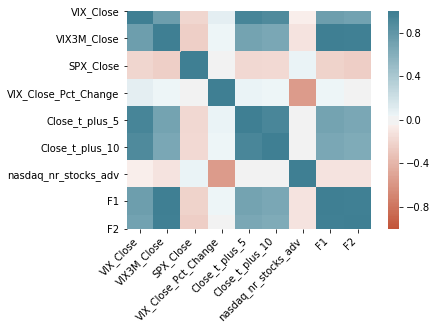

In [70]:
import seaborn as sns

corr = df_main_merged[['VIX_Close',
                       'VIX3M_Close',
                       'SPX_Close',
                       'VIX_Close_Pct_Change',
                       'Close_t_plus_5', 
                       'Close_t_plus_10',
                       'nasdaq_nr_stocks_adv',
                       'F1',
                       'F2']].corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# RANDOM FOREST
Normalization is not necessary for Random Forest

## Features for Random Forest

In [71]:
df_features_rf = df_main_merged[(df_main_merged.index > '2007-10-01') & (df_main_merged.index < '2019-09-30')][['VIX_Close', 
                                 'VIX3M_Close', 
                                 'VIX_label', 
                                 'VIX_label_t_minus_5', 
                                 'VIX_label_t_minus_10',
                                 'P/C Ratio',
                                 'VVIX',
                                 'VIX_High_Low_Range',
                                 'VIX_Close_Pct_Change',
                                 'VIX_Close_Pct_Change_minus_2d',
                                 'VIX_Close_Pct_Change_minus_3d',
                                 'VIX_Close_Pct_Change_minus_4d',
                                 'VIX_Close_Pct_Change_minus_5d',
                                 'Diff_F2_F1',
                                 'Diff_F3_F2',
                                 'Diff_F4_F3',
                                 'Diff_F5_F4',
                                 'Diff_F6_F5',
                                 'Diff_F7_F6',
                                 'Diff_F8_F7',
                                 'Cont_F7_F4',
                                 'VVIX_Minus_1',
                                 'VVIX_Minus_2',
                                 'VVIX_Minus_3',
                                 'VVIX_Minus_4',
                                 'VVIX_Minus_5',
                                 'VVIX_Pct_Change',
                                 'VVIX_Pct_Change_minus_2d',
                                 'VVIX_Pct_Change_minus_3d',
                                 'VVIX_Pct_Change_minus_4d',
                                 'VVIX_Pct_Change_minus_5d',
                                 'SPX_Pct_Change',
                                 'SPX_Pct_Change_minus_2d',
                                 'SPX_Pct_Change_minus_3d',
                                 'SPX_Pct_Change_minus_4d',
                                 'SPX_Pct_Change_minus_5d',
                                 'VIX_Close_Minus_1',
                                 'VIX_Close_Minus_2',
                                 'VIX_Close_Minus_3',
                                 'VIX_Close_Minus_4',
                                 'VIX_Close_Minus_5',
                                ]].copy()

df_target_rf = df_main_merged[(df_main_merged.index > '2007-10-01') & (df_main_merged.index < '2019-09-30')][ 
                                 'VIX_label_t_plus_5'].copy()
df_target_rf.head(5)

Date
2007-10-02    3.0
2007-10-03    3.0
2007-10-04    3.0
2007-10-05    3.0
2007-10-08    3.0
Name: VIX_label_t_plus_5, dtype: float64

## Train Test Split

In [72]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_features_rf, df_target_rf, test_size=0.2) # 70% training and 30% test


In [73]:
X_train.tail(10)

,VIX_Close,VIX3M_Close,VIX_label,VIX_label_t_minus_5,VIX_label_t_minus_10,P/C Ratio,VVIX,VIX_High_Low_Range,VIX_Close_Pct_Change,VIX_Close_Pct_Change_minus_2d,...,SPX_Pct_Change,SPX_Pct_Change_minus_2d,SPX_Pct_Change_minus_3d,SPX_Pct_Change_minus_4d,SPX_Pct_Change_minus_5d,VIX_Close_Minus_1,VIX_Close_Minus_2,VIX_Close_Minus_3,VIX_Close_Minus_4,VIX_Close_Minus_5
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-29,34.130001,34.38,6,5.0,5.0,1.09,104.00,4.170000,0.176897,0.196285,...,-0.031017,-0.032988,-0.030223,-0.046518,-0.049365,29.000000,28.530001,29.740000,26.91,27.049999
2017-01-10,11.490000,14.66,2,2.0,2.0,0.89,86.36,0.480000,-0.006055,0.015018,...,0.000000,-0.003549,-0.000044,-0.000815,0.004903,11.560000,11.320000,11.670000,11.85,12.850000
2016-12-22,11.430000,15.29,2,2.0,2.0,0.89,89.72,0.530000,0.014197,-0.001747,...,-0.001863,-0.004316,-0.000694,0.001280,-0.000473,11.270000,11.450000,11.710000,12.20,12.790000
2019-02-27,14.700000,15.99,2,2.0,3.0,0.93,80.37,1.470000,-0.030982,-0.010101,...,-0.000544,-0.001334,-0.000104,0.006307,0.002758,15.170000,14.850000,13.510000,14.46,14.020000
2009-02-06,43.369999,43.38,8,8.0,9.0,0.71,94.01,2.509998,-0.008232,-0.010946,...,0.026896,0.043702,0.035885,0.052287,0.051727,43.730000,43.849998,43.060001,45.52,44.840000
2010-03-15,18.000000,20.72,3,3.0,3.0,0.79,75.22,0.820002,0.023891,-0.003322,...,0.000452,0.000235,0.004277,0.008821,0.010549,17.580000,18.059999,18.570000,17.92,17.790001
2013-07-11,14.010000,15.50,2,3.0,3.0,1.01,77.16,0.630000,-0.014075,-0.023693,...,0.013554,0.013738,0.021067,0.026429,0.036901,14.210000,14.350000,14.780000,14.89,16.200001
2016-11-25,12.340000,15.51,2,2.0,2.0,0.80,82.65,0.429999,-0.007241,-0.005641,...,0.003914,0.004726,0.006901,0.014414,0.011993,12.430000,12.410000,12.420000,12.85,13.350000
2012-12-28,22.719999,21.88,4,3.0,3.0,1.08,104.72,3.289999,0.166923,0.166324,...,-0.011050,-0.012255,-0.016984,-0.019383,-0.028579,19.469999,19.480000,17.840000,17.84,17.670000


In [74]:
from sklearn.ensemble import RandomForestClassifier


clf=RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,y_train)


y_pred=clf.predict(X_test)


In [75]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7123966942148761


In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  2,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  3, 194,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,  37, 134,   7,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   5,  33,  66,   6,   1,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   2,  13,  16,   0,   3,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   1,   5,   8,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   1,   1,   1,   0,   4,   3,   2,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   1,   2,   3,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   2,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   1,   0,   1,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,
          0],
       [  0,   0,   0,   0,   0,   0,   0, 

## 1. Define the different LSTM Models to create, train and test

## 1. Load LSTM models definition from json to create, train and test

In [ ]:
import os
import json

# Method to load json file
def load_model(name):
    
    if name is not None:
        with open(name, 'r') as json_file:
            json1_data = json.load(json_file)

        d = json.loads(json1_data)
        type(d)

    return d


# Define filename
json_file_lstm_models = 'lstm_model_def.json'
all_lstm_model_json = os.path.join('models', json_file_lstm_models)
    
#load_model('models\lstm_model_def.json')
with open(all_lstm_model_json, 'r') as json_file:
    lstm_models_dict = json.load(json_file)

# Set Nr of features
for lstm_model in lstm_models_dict:
    if lstm_models_dict[lstm_model]['use_target_for_training'] == False:
        lstm_models_dict[lstm_model]['nr_features'] = len(lstm_models_dict[lstm_model]['feature_list']) - 1
    else:
        lstm_models_dict[lstm_model]['nr_features'] = len(lstm_models_dict[lstm_model]['feature_list'])

print("Model file with json definition loaded into dictionary!")
print("These are the models in the dictionary:")

i = 0

# Create/build for every model its feature(s) dataset and assign it
for lstm_model in lstm_models_dict:
    
    i+=1
    
    # Get first feature of model
    print(f"{i}. {lstm_model}")


### 1.1. Load all previously trained LSTM models from files (.h5, .json)
All previously trained models will be loaded and assigned to the dictionary if definition already exists in the dict.

In [ ]:
from keras.models import load_model
from keras.models import model_from_json
import os

def find_file(model_name, ftype = "h5"):
    
    # Define directory with all models saved
    directory = os.fsencode('models')
    
    # loop over all files in the directory
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        
        if model_name in filename:
            if filename.endswith("." + ftype):
                return filename
                break;
    
    return None


def load_model(model_name = None):
    
    """
    Loads saved model(s).
    If a name was given then only this one model will be loaded else all possible models found in the dictionary.
    """
    
    if model_name is None:
        # Loop over all models in dictionary. If model exist in file, then load it.
        for lstm_model in lstm_models_dict:
            
            lstm_model_file_h5 = find_file(lstm_model, 'h5')
            lstm_model_file_json = find_file(lstm_model, 'json')
            
            if lstm_model_file_h5 is not None and lstm_model_file_json is not None:

                # Define filenames
                lstm_model_file_name_h5 = os.path.join('models', find_file(lstm_model, 'h5'))
                lstm_model_file_name_json = os.path.join('models', find_file(lstm_model, 'json'))

                # load json and create model
                json_file = open(lstm_model_file_name_json, 'r')
                loaded_model_json = json_file.read()
                json_file.close()
                loaded_model = model_from_json(loaded_model_json)

                # load weights into new model
                loaded_model.load_weights(lstm_model_file_name_h5)

                # Assign loaded model to its definition in the dictionary
                lstm_models_dict[lstm_model]['lstm_model'] = loaded_model
                print(f"Loaded model {lstm_model} from disk")
                
            else:
                print(f"No LSTM model file(s) found for model: {lstm_model}.")

# Load Model(s)
load_model()

## 2. Data Preparation

### 2.1. Split the data into train/test sets - Univariate and Multivariate

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import datetime

In [ ]:
# Set full length of the dataframe
len_df = len(df_main_merged)

# Percentage of data to test
prct_test = 0.15

# Split in training and test set
df_main_merged_train = df_main_merged.iloc[:len_df - int(prct_test * len_df)]
df_main_merged_test = df_main_merged.iloc[len_df - int(prct_test * len_df):]

print("Data Summary")
print("============")
print(f"Percentage train/test dataset: \t{1-prct_test}/{prct_test}")
print(f"Length all data: \t\t{len_df}")
print(f"Length train dataset: \t\t{len(df_main_merged_train)}")
print(f"Length test dataset: \t\t{len(df_main_merged_test)}")
print(f"Timeframe train dataset: \t{df_main_merged_train.index[0].strftime('%Y-%m-%d')} until {df_main_merged_train.index[-1].strftime('%Y-%m-%d')}")
print(f"Timeframe test dataset: \t{df_main_merged_test.index[0].strftime('%Y-%m-%d')} until {df_main_merged_test.index[-1].strftime('%Y-%m-%d')}")

### 2.2. Build the features datasets for each model
Since we want to train and test different LSTM model we have to create for each model its features (train and test) dataset.

In [ ]:
# Create/build for every model its feature(s) dataset and assign it
for lstm_model in lstm_models_dict:
    
    # Get first feature of model
    first_feature_of_model = lstm_models_dict[lstm_model]['feature_list'][0]
    
    # ------------ TRAIN DATASET ------------

    # Get train dataset of the first feature
    ds_train = np.array(df_main_merged_train[first_feature_of_model]).copy()

    # Reshape training dataset from 1D into 2D
    ds_train = np.reshape(ds_train, (-1,1)).copy()
    
    # ------------ TEST DATASET ------------

    # Get test dataset of the first feature
    ds_test = np.array(df_main_merged_test[first_feature_of_model]).copy()
    
    # Reshape testing dataset from 1D into 2D
    ds_test = np.reshape(ds_test, (-1,1)).copy()
    
    # Loop over all features except the first one because it is already considered
    for feature in lstm_models_dict[lstm_model]['feature_list'][1:]:
        
        # ------------ TRAIN DATASET ------------

        # Get / create a numpy array of the training data
        ds_train_new = np.array(df_main_merged_train[feature]).copy()
        ds_train_new = np.reshape(ds_train_new, (-1,1)).copy()

        # Concat the train feature arrays 
        ds_train = np.hstack((ds_train, ds_train_new))

        # ------------ TEST DATASET ------------

        # Get / create a numpy array of the test data
        ds_test_new = np.array(df_main_merged_test[feature]).copy()
        ds_test_new = np.reshape(ds_test_new, (-1,1)).copy()

        # Concat the test feature arrays 
        ds_test = np.hstack((ds_test, ds_test_new))

    
    # After building the feature(s) dataset assign it to the model
    lstm_models_dict[lstm_model]['train_dataset'] = ds_train
    lstm_models_dict[lstm_model]['test_dataset'] = ds_test


### 2.3. Normalizing data: Data Scaling using MinMaxScaler from sklearn
This step is necessary for a successful training because neural networks learn best way if data are normalized, e.g. have values between 0 and 1. For this reason a scaler provided by scikit learn library will be used. It is possible that applying the scaler on the test data the results can be > 1 because the scaler was not fitted on the test data.

After a successful, training predicted data can be scaled back using the same scaler.

More infos here:https://machinelearningmastery.com/how-to-use-the-timeseriesgenerator-for-time-series-forecasting-in-keras/

#### Steps to prepare and scale datasets 

Prepare features for later use in the TimeSeriesGenerator

> 1. Normalize Data
> 2. Reshape
> 3. Add to dataset
> 4. Assign to the model's dictionary

In [ ]:
# Import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create/build for every model its feature(s) dataset and assign it
# Scale the datasets
for lstm_model in lstm_models_dict:
    
    print(lstm_model)
    print("=================================================")

    # Create scaler object that has to be trained and data to be transformed according to the fitted
    # scaler object. Every feature has its own MinMaxScaler
    scaler_list = []
    
    # ------------ TRAIN DATASET ------------
    
    # Check the shape of the feature dataset (TRAIN)
    model_feature_shape_test = lstm_models_dict[lstm_model]['train_dataset'].shape
    
    # Create an empy numpy array with the same shape as the feature set
    ds_train = np.empty(model_feature_shape_test)
    
    # ------------ TEST DATASET ------------
    
    # Check the shape of the feature dataset (TEST)
    model_feature_shape_train = lstm_models_dict[lstm_model]['test_dataset'].shape
    
    # Create an empy numpy array with the same shape as the feature set
    ds_test = np.empty(model_feature_shape_train)
    
    
    # Loop over all features of the model and if need to be scaled scale the feature.
    for feature_nr in range(0, len(lstm_models_dict[lstm_model]['feature_list'])):
        
        # ------------ TRAIN DATASET ------------
        
        # If feature should be scaled according to its definition in the dict then it should be done here
        if feature_nr in lstm_models_dict[lstm_model]['feature_list_scaled']:
            
            # Add new scaler for this feature
            scaler = MinMaxScaler(feature_range=(0, 1), copy=True)

            # Define the dataset of the feature to be scaled
            ds_train_feature_scaled = lstm_models_dict[lstm_model]['train_dataset'][:,feature_nr].reshape((-1,1)).copy()

            # Trains the scaler based on the training dataset, NOT TEST DATASET!
            scaler.fit(ds_train_feature_scaled)

            # Scale the training dataset
            scaled_dataset_train = scaler.transform(ds_train_feature_scaled)

            # Add scaled data set to ds_train
            ds_train[:,feature_nr] = scaled_dataset_train[:,-1].copy()

            scaler_list.append(scaler)
        
        # If feature should not be scaled
        else:
            ds_train_feature = lstm_models_dict[lstm_model]['train_dataset'][:,feature_nr].copy()
            
            # Add dataset the ds_train feature array
            ds_train[:,feature_nr] = ds_train_feature


        # ------------ TEST DATASET ------------
        
        # If feature should be scaled according to its definition in the dict then it should be done here
        if feature_nr in lstm_models_dict[lstm_model]['feature_list_scaled']:
            
            # Define the dataset of the feature (test) to be scaled
            ds_test_feature_scaled = lstm_models_dict[lstm_model]['test_dataset'][:,feature_nr].reshape((-1,1)).copy()

            # Scale the test dataset using scaler of the feature's training dataset (above)
            scaled_dataset_test = scaler.transform(ds_test_feature_scaled)

            # Add scaled dataset to ds_test
            ds_test[:,feature_nr] = scaled_dataset_test[:,-1].copy()

        # If feature should not be scaled
        else:
            ds_test_feature = lstm_models_dict[lstm_model]['test_dataset'][:,feature_nr].copy()
            
            # Add dataset the ds_train feature array
            ds_test[:,feature_nr] = ds_test_feature

        
    # After building, creating the scaler and fitting, assign the datasets and scaler to the model
    lstm_models_dict[lstm_model]['train_dataset_scaled'] = ds_train
    lstm_models_dict[lstm_model]['test_dataset_scaled'] = ds_test
    lstm_models_dict[lstm_model]['scaler_list'] = scaler_list # stores all scalers for each feature that has to be scaled


### 2.4. Use TimeSeriesGenerator to create the right dataset shapes for each model

LSTM require predefined structure (shape) of the data (samples), e.g. the sequence (batch size) and the number of features (vector length). Therefore the data must be prepared accordingly. This can be done manually using numpy package but is a complex and challenging process and can result in error easily. For this reason keras provides a packages called TimeSeriesGenerator that does this easily and can be used directly to train the network.

Here we will have only one feature (univariate) and we will use a sequence of 20 timesteps. This two parameters will be used to create the generator
- Length of sequence / number of timesteps: 20
- Number of features: 1

Example for the TimeSeriesGenerator

```python
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
generator = TimeseriesGenerator(arr, arr, length=2, batch_size=1)

n_features = 1

# Reshape from 1D -> 2D for LSTM
arr = arr.reshape((len(arr), n_features))
```

LSTM expects this shape: [nr of samples, sequence length, features]. In some cases a reshape to the array is necessary.

Although we may understand the theory of LSTMs, it is not quite abvious to understand several parameters to use to train your models, e.g. the input shape. 

<img src="https://miro.medium.com/max/532/1*AQKRJsRdWx2HZ85H1yWoKw.png" width=300>Source: https://medium.com/@shivajbd/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e

The input shape is always a three dimensional array (tuple).

Difference between:
- <b>input_shape</b>: first parameter (batch_size) can be none, the other two are length of sequence (value of timesteps) and input units (nr of features)
- <b>batch_input_shape</b>: Here you have to give the number of batch_size and the other two as well


More on this topic: 
https://machinelearningmastery.com/how-to-use-the-timeseriesgenerator-for-time-series-forecasting-in-keras/

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator


In [ ]:
# Create/build the TimeSeriesGenerator for each model
for lstm_model in lstm_models_dict:
    
    print(lstm_model)
    print("===================================================")
    
    # Target feature index that should be trained on
    target_feature_to_predict = lstm_models_dict[lstm_model]['target'] 
    
    # TS Sequence Length for this model
    model_ts_sequ_len = lstm_models_dict[lstm_model]['ts_sequ_len']
    
    # Batch Size for training
    model_train_batch_size = lstm_models_dict[lstm_model]['batch_size']
    
    # ------------ TRAIN DATASET ------------
    
    # Get the TRAINING dataset(scaled)
    ds_train_scaled = lstm_models_dict[lstm_model]['train_dataset_scaled']
    # Get the TRAINING dataset(NOT scaled)
    ds_train = lstm_models_dict[lstm_model]['train_dataset']
    # Get the TRAINING-TARGET dataset (scaled)
    ds_train_scaled_target = lstm_models_dict[lstm_model]['train_dataset_scaled'][:,target_feature_to_predict].reshape((-1,1))
    # Get the TRAINING-TARGET dataset (NOT scaled)
    ds_train_target = lstm_models_dict[lstm_model]['train_dataset'][:,target_feature_to_predict].reshape((-1,1))
    
    # Delete the feature (based on given index) from data that should not be accounted as feature for training
    # but only as target dataset
    if lstm_models_dict[lstm_model]['use_target_for_training'] == False:
        # Delete Target (scaled dataset) if the target feature should not be accounted for training
        ds_train_scaled = np.delete(ds_train_scaled, target_feature_to_predict, axis=1).copy()
        # Delete Target (NOT scaled dataset) if the target feature should not be accounted for training
        ds_train = np.delete(ds_train, target_feature_to_predict, axis=1).copy()
    
    # Execute TimeseriesGenerator (on scaled dataset)
    ts_gen_train_scaled = TimeseriesGenerator(
                            data = ds_train_scaled, 
                            targets = ds_train_scaled_target,  # should have same length as data
                            length = model_ts_sequ_len, # Length of the output sequences (in number of timesteps).
                            batch_size = model_train_batch_size,
                            reverse = False               # If timeseries is reversed today -> past => past -> today
                            )
    
    # Assign scaled TS Generator to the dictionary
    lstm_models_dict[lstm_model]['train_ts_generator_scaled'] = ts_gen_train_scaled    
    
    # Execute TimeseriesGenerator (on NOT scaled dataset)
    ts_gen_train = TimeseriesGenerator(
                            data = ds_train, 
                            targets = ds_train_target,  # should have same length as data
                            length = model_ts_sequ_len, # Length of the output sequences (in number of timesteps).
                            batch_size = model_train_batch_size,
                            reverse = False               # If timeseries is reversed today -> past => past -> today
                            )
    
    # Assign NOT scaled TS Generator to the dictionary
    lstm_models_dict[lstm_model]['train_ts_generator'] = ts_gen_train
    
    
    # ------------ TEST DATASET ------------
    
    # Get the TRAINING dataset (scaled)
    ds_test_scaled = lstm_models_dict[lstm_model]['test_dataset_scaled']
    # Get the TRAINING dataset (NOT scaled)
    ds_test = lstm_models_dict[lstm_model]['test_dataset']
    # Get the TRAINING-TARGET dataset (scaled)
    ds_test_scaled_target = lstm_models_dict[lstm_model]['test_dataset_scaled'][:,target_feature_to_predict].reshape((-1,1))
    # Get the TRAINING-TARGET dataset (not scaled)
    ds_test_target = lstm_models_dict[lstm_model]['test_dataset'][:,target_feature_to_predict].reshape((-1,1))
    
    # Delete the feature (based on given index) from data that should not be accounted as feature for training
    # but only as target dataset
    if lstm_models_dict[lstm_model]['use_target_for_training'] == False:
        # Delete Target feature from ds_test_scaled if not in account
        ds_test_scaled = np.delete(ds_test_scaled, target_feature_to_predict, axis=1).copy()
    
    # Execute TimeseriesGenerator (scaled)
    ts_gen_test_scaled = TimeseriesGenerator(
                            data = ds_test_scaled, 
                            targets = ds_test_scaled_target,  # should have same length as data
                            length = model_ts_sequ_len, # Length of the output sequences (in number of timesteps).
                            batch_size = model_train_batch_size,
                            reverse = False               # If timeseries is reversed today -> past => past -> today
                            )

    # Assign (save) the created TimeSeriesGenerator in the dictionary
    lstm_models_dict[lstm_model]['test_ts_generator_scaled'] = ts_gen_test_scaled

    
    # Execute TimeseriesGenerator (scaled)
    ts_gen_test = TimeseriesGenerator(
                            data = ds_test, 
                            targets = ds_test_target,  # should have same length as data
                            length = model_ts_sequ_len, # Length of the output sequences (in number of timesteps).
                            batch_size = model_train_batch_size,
                            reverse = False               # If timeseries is reversed today -> past => past -> today
                            )
    
    # Assign (save) the created TimeSeriesGenerator in the dictionary
    lstm_models_dict[lstm_model]['test_ts_generator'] = ts_gen_test
    
    

## 3. LSTM Model definition

### 3.1. Functions to define and compile LSTM Models (Keras) AND to train/fit

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import datetime


In [ ]:
def create_lstm(lstm_model_name):
    
    """
    For a given LSTM Model name the appropriate model will be created based on given parameters found
    in the dictionary.
    """

    # Create model
    model = Sequential(name = lstm_model_name)

    # Adding the first LSTM layer and some Dropout regularisation
    # "units: Positive integer, dimensionality of the output space."
    # return_sequences: to return output at each time steps or only at the end. This has an influene on the output parameter.
    #                   If set to true the output dimension will be 3D else 2D.
    # input_shape: a tupel with length of sequence (nr of samples) and number of features per data in one sample
    # batch_input_shape: tupel of 
    #     1: A batch of one or more sequences / samples. Can be none.
    #     2: Nr of time steps / length of one sequence of a sample
    #     3: Nr of features.

    # Get nr of features 
    nr_features = lstm_models_dict[lstm_model]['nr_features']

    # Length of TS sequence
    ts_sequ_len = lstm_models_dict[lstm_model]['ts_sequ_len']
    batch_size = None

    # E.g. "tanh"
    lstm_activation_func = lstm_models_dict[lstm_model]['lstm_activation_func']

    # E.g. 0.2
    lstm_layer_dropout = lstm_models_dict[lstm_model]['lstm_layer_dropout']

    # E.g. 50
    lstm_layer_unit = lstm_models_dict[lstm_model]['lstm_layer_unit']

    batch_input_shape_t = (batch_size,
                           ts_sequ_len,
                           nr_features)

    # Add first layer
    model.add(LSTM(units = lstm_layer_unit, 
                   activation=lstm_activation_func, 
                   return_sequences = True, 
                   batch_input_shape = batch_input_shape_t))
    model.add(Dropout(0.2))

    # Adding the second LSTM layer and some Dropout regularisation
    # Here, we don't have to put the input shapes, because it will receive data from previous layer and knows the shapes
    # It automatically understand that
    model.add(LSTM(units = lstm_layer_unit, return_sequences = True))
    model.add(Dropout(lstm_layer_dropout))

    # Adding the third LSTM layer and some Dropout regularisation
    model.add(LSTM(units = lstm_layer_unit, return_sequences = True))
    model.add(Dropout(lstm_layer_dropout))

    # Adding the fourth LSTM layer and some Dropout regularisation
    model.add(LSTM(units = lstm_layer_unit))
    model.add(Dropout(lstm_layer_dropout))

    # Adding the output layer
    # Docs: "Just your regular densely-connected NN layer."
    # units: Positive integer, dimensionality of the output space.
    model.add(Dense(units = 1))

    # Compiling the RNN
    # Goal: "Configures the model for training."
    # Adam: good for big data
    # Metrics: List of metrics to be evaluated by the model during training and testing.
    model.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy', 'mse'])

    # Show the model and its details
    model.summary()

    # Add to the model dictionary
    lstm_models_dict[lstm_model]['lstm_model'] = model

    print(f"Model {lstm_model} created.")

            
def train_fit_lstm(lstm_model_name):
    """
    For a given LSTM Model-name the appropriate model will be trained based on parameters found in the dictionary.
    """

    # Set the start time
    start_time = datetime.datetime.now().replace(microsecond=0)

    # TS Generator
    ts_gen = lstm_models_dict[lstm_model]['train_ts_generator_scaled']

    # Steps per epoch
    steps_per_epoch = lstm_models_dict[lstm_model]['steps_per_epoch']

    # Nr of epochs to train
    nr_epochs = lstm_models_dict[lstm_model]['nr_epochs']

    # Nr of features
    nr_features = lstm_models_dict[lstm_model]['nr_features']

    # Model to train
    model = lstm_models_dict[lstm_model]['lstm_model']

    # Traing the model
    model.fit_generator(ts_gen,
                        steps_per_epoch = steps_per_epoch,
                        epochs = nr_epochs,
                        verbose = 1)

    # Set the end time
    end_time = datetime.datetime.now().replace(microsecond=0)

    # Save the time difference to know the training time
    lstm_models_dict[lstm_model]['training_time'] = str(end_time - start_time)

    print(f"Done with model {lstm_model}")
    print()

### 3.2. Execute Definition & Train/fit on each LSTM model
After training the model it will be saved to the disk.

In [ ]:
# Create/build the TimeSeriesGenerator for each model
for lstm_model in lstm_models_dict:

    # For all models in the dictionary without an assigned and trained model (no model file exist)
    if lstm_models_dict[lstm_model]['lstm_model'] is None:
        
        # Create/define lstm layers/model
        create_lstm(lstm_model)
        
        # Train/fit each ts_generator
        train_fit_lstm(lstm_model)

## 4. Evaluation


### 4.1. Predict (Test)
Do the prediction for each of the defined LSTM models in the dictionary using the data stored in the dictionary for each of the models.

In [ ]:
# Predict using test dataset
for lstm_model in lstm_models_dict:
    
        # Print Modelname
    print(f"Model: {lstm_model}")
    print(f"===================================================")
    
    # Empty array for the prediction dataset (test dataset as well as train dataset)
    pred_arr_test = np.array([])
    pred_arr_train = np.array([])
    
    # The generator that contains test dataset to do the prediction (test)
    ts_generator_test = lstm_models_dict[lstm_model]['test_ts_generator_scaled']
    ts_generator_train = lstm_models_dict[lstm_model]['train_ts_generator_scaled']
    
    # Get the (trained, fitted) model to do the prediction
    model = lstm_models_dict[lstm_model]['lstm_model']
    
    # We need this number to understand which feature should be predicted and get its scaler to do inverse scale
    target_feature = lstm_models_dict[lstm_model]['target']
    
    # Only if feature was in the feature list scaled (list that defines which features have to be scaled)
    if target_feature in lstm_models_dict[lstm_model]['feature_list_scaled']:
        # Get the inverse scale of the model from its dictionary
        scaler = lstm_models_dict[lstm_model]['scaler_list'][target_feature]

    # Append predicted value to the array of all predictions
    pred_arr_test = model.predict_generator(ts_generator_test)
    pred_arr_train = model.predict_generator(ts_generator_train)

    # Only if feature was in the feature list scaled (list that defines which features have to be scaled)
    if target_feature in lstm_models_dict[lstm_model]['feature_list_scaled']:
        # Add the predicted values to the models dictionary
        lstm_models_dict[lstm_model]['predicted_values_test_scaled'] = pred_arr_test
        lstm_models_dict[lstm_model]['predicted_values_train_scaled'] = pred_arr_train
    else:
        lstm_models_dict[lstm_model]['predicted_values_test_scaled'] = None
    
    # Only if feature was in the feature list scaled (list that defines which features have to be scaled)
    if target_feature in lstm_models_dict[lstm_model]['feature_list_scaled']:
        # Inverse the predicted values and add the result to the models dictionary
        lstm_models_dict[lstm_model]['predicted_values_test'] = scaler.inverse_transform(pred_arr_test).copy()
        lstm_models_dict[lstm_model]['predicted_values_train'] = scaler.inverse_transform(pred_arr_train).copy()
    else:
        lstm_models_dict[lstm_model]['predicted_values_test'] = pred_arr_test
        lstm_models_dict[lstm_model]['predicted_values_train'] = pred_arr_train
    
    # Get length of TS Sequence
    ts_sequ_len = lstm_models_dict[lstm_model]['ts_sequ_len']
    
    # Print predicted values
    print(f"ts_sequ_len: {ts_sequ_len}")
    print(f"test_dataset: Length: {len(lstm_models_dict[lstm_model]['test_dataset'])}")
    print(f"train_dataset: Length: {len(lstm_models_dict[lstm_model]['train_dataset'])}")
    print(f"predicted_values (test): Length: {len(lstm_models_dict[lstm_model]['predicted_values_test'])}")
    print(f"predicted_values (train): Length: {len(lstm_models_dict[lstm_model]['predicted_values_train'])}")
    print()
    

### 4.2. Calculate RMSE + Check overfit/underfit

IF RMSE(Train Data) < RMSE(Test Data) then overfit.<br>
IF RMSE(Train Data) > RMSE(Test Data) then underfit.<br>

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

for lstm_model in lstm_models_dict:
    
    # Print Modelname
    print(f"Model: {lstm_model}")
    print(f"========================================")
    
    # TS Sequence Length
    target_feature_nr = lstm_models_dict[lstm_model]['target']
    
    # TS Sequence Length
    ts_sequ_len = lstm_models_dict[lstm_model]['ts_sequ_len']
    
    # which nr of day in the future had to be predicted:
    fut_point_time_step = lstm_models_dict[lstm_model]['fut_point_time_step']
    
    # The predicted values
    pred_values_test = lstm_models_dict[lstm_model]['predicted_values_test']
    pred_values_train = lstm_models_dict[lstm_model]['predicted_values_train']
    
    # The real values
    real_values_test = lstm_models_dict[lstm_model]['test_dataset'][ts_sequ_len:, target_feature_nr]
    real_values_train = lstm_models_dict[lstm_model]['train_dataset'][ts_sequ_len:, target_feature_nr]
    
    # calculate RMSE
    rmse_test = sqrt(mean_squared_error(real_values_test, pred_values_test))
    rmse_train = sqrt(mean_squared_error(real_values_train, pred_values_train))
    lstm_models_dict[lstm_model]['rmse_test'] = rmse_test
    lstm_models_dict[lstm_model]['rmse_train'] = rmse_train
    
    # Print RMSE
    print(f"RMSE (Test): {round(rmse_test, 4)}")
    print(f"RMSE (Train): {round(rmse_train, 4)}")
    
    # IF RMSE(Train Data) < RMSE(Test Data) then overfit.
    # IF RMSE(Train Data) > RMSE(Test Data) then underfit.
    if round(rmse_test,1) > round(rmse_train,1):
        print(f"Model is overfitting!")
    elif round(rmse_test,1) < round(rmse_train,1):
        print(f"Model is underfitting!")
    else:
        print(f"Model is neither overfitting nor underfitting!")
    
    print()


### 4.3. Save all trained models and dictionary

#### 4.3.1. Save all models as .json and .h5 files
Save all trained models (if not already exist).

In [ ]:
from keras.models import load_model
from keras.models import model_from_json
import os
from datetime import datetime

for lstm_model in lstm_models_dict:
    
    # Print Modelname
    print(f"Model: {lstm_model}")
    print(f"===================================================")
    
    lstm_model_file_h5 = find_file(lstm_model, 'h5')
    lstm_model_file_json = find_file(lstm_model, 'json')
            
    if lstm_model_file_h5 is None and lstm_model_file_json is None:
    
        # Get the model from dictionary
        model = lstm_models_dict[lstm_model]['lstm_model']

        # Define some parameters for model name
        date_now = datetime.now().strftime('%Y%m%d_%H%M%S')
        nr_epochs = model.history.params['epochs']
        rmse = lstm_models_dict[lstm_model]['rmse_test']
        nr_features = lstm_models_dict[lstm_model]['nr_features']

        # Create file name
        model_file_name = date_now + '_' + model.name + '_epochs_' + str(nr_epochs) + '_rmse_' + str(round(rmse, 4)) + '_features_' + str(nr_features)
        model_file_name_h5 = os.path.join('models', model_file_name + '.h5')
        model_file_name_json = os.path.join('models', model_file_name + '.json')

        # serialize model to JSON
        model_json = model.to_json()
        with open(model_file_name_json, "w") as json_file:
            json_file.write(model_json)

        # serialize weights to HDF5
        model.save_weights(model_file_name_h5)
        print("Saved model to disk")

        print(f"Model {lstm_model} saved to file(s).")
        print()
        
    else:
        
        print(f"Model {lstm_model} is already stored in file(s) {lstm_model_file_h5} and {lstm_model_file_json}")
        
        print()

### 4.4. Calculate daily returns and direction

This part is not perfect finalized yet but should give a first impression of a possible performance.

For models that use another prediction method (such as percentage,  time step in future or a VIX label) this approach is not ready yet.

In [ ]:

def cal_return(close, pred, close_before):
    
    """
    Calculates the daily profit as evaluation.
    If Close-1 > Close (VIX increase) then calculation of profit using predicted values: pred/close-1
    ELSE (Close-1) < Close (VIX decrease) then calculation of profit using predicted values: close_before/pred-1
    """
    
    if close > close_before and pred <= close:
        ret = pred/close_before-1
    elif close > close_before and pred > close:
        ret = close/close_before-1
    elif close < close_before and pred > close:
        ret = close_before/pred-1
    elif close < close_before and pred <= close:
        ret = close_before/close-1
    else:
        ret = 0

    return ret



def get_direction(close, close_before):
    
    """
    Calculates the direction of the VIX.
    """
    return 1 if close > close_before else -1


# Loop over all models
for lstm_model in lstm_models_dict:
    
    # Print Modelname
    print(f"Model: {lstm_model}")
    print(f"===================================================")
    
    # Create an empty dataframe
    df = pd.DataFrame()
    
    # TS Sequence Length
    ts_sequ_len = lstm_models_dict[lstm_model]['ts_sequ_len']
    
    # What is the timestep in the future you wanted to predict and here test?
    fut_point_time_step = lstm_models_dict[lstm_model]['fut_point_time_step']
    
    # RMSE
    rmse_test = lstm_models_dict[lstm_model]['rmse_test']
    rmse_train = lstm_models_dict[lstm_model]['rmse_train']
    
    # Which timestep in the future are you predicting (next day, the next 5th day or 10th day)
    timestep_in_future = lstm_models_dict[lstm_model]['fut_point_time_step']
    
    # The real closing values
    df['close_before'] = lstm_models_dict[lstm_model]['test_dataset'][ts_sequ_len-timestep_in_future-1:-timestep_in_future-1, 0]
    # Here we have add +1 because this is the value predicted after the ts sequence 
    df['close_real_values'] = lstm_models_dict[lstm_model]['test_dataset'][ts_sequ_len-timestep_in_future:-timestep_in_future, 0]
    
    # The predicted values
    df['pred_values'] = lstm_models_dict[lstm_model]['predicted_values_test'].reshape(-1)

    # Add to column 'pred_daily_returns' of data frame
    df['pred_daily_returns'] = df.apply(lambda x : cal_return(x['close_real_values'],
                                                              x['pred_values'],
                                                              x['close_before'],
                                                              ),axis=1)
    
    df['cum_sum_series'] = df['pred_daily_returns'].cumsum(axis=0).copy()
    lstm_models_dict[lstm_model]['cum_sum_series'] = df['cum_sum_series']
    
    # Save predicted directions
    df['pred_directions'] = df.apply(lambda x : get_direction(x['pred_values'],
                                                              x['close_before'],
                                                               ),axis=1)
    
    # Save real directions
    df['real_directions'] = df.apply(lambda x : get_direction(x['close_real_values'],
                                                                x['close_before'],
                                                               ),axis=1)
    
    # Save sum of all returns
    lstm_models_dict[lstm_model]['sum_pred_daily_profits'] = round(df['pred_daily_returns'].sum(), 6)

    print(f"Sum of all returns: {lstm_models_dict[lstm_model]['sum_pred_daily_profits']}")
    print(f"rmse_test: {round(rmse_test, 2)}")
    print(f"rmse_train: {round(rmse_train, 2)}")
    
    print()

#### 4.4.1. Print cumulative (potential) daily profits

In [ ]:
# Loop over all models
for lstm_model in lstm_models_dict:
    
    # RMSE
    rmse_test = lstm_models_dict[lstm_model]['rmse_test']
    rmse_train = lstm_models_dict[lstm_model]['rmse_train']

    plt.figure(figsize=(16,6))
    plt.title(f'Cumulative (potential) profits: {lstm_model}, RMSE_TRAIN: {round(rmse_train, 2)}, RMSE_TEST: {round(rmse_test, 2)}')
    plt.xlabel('Time Steps')
    plt.ylabel('Daily Profit (%)')

    lstm_models_dict[lstm_model]['cum_sum_series'].plot()

### 4.7. Visualize all predicted models

In [ ]:
def viz_prediction(pred_vals, name_pred_vals, real_values, name_real_vals, title, steps = None, 
                   sequ_len = None, 
                   ts_future = 1):
    
    # Visualising the results
    plt.figure(figsize=(16,6))
    
    if ts_future > 1:
        real_vix = df_main_merged_test['VIX_Close'].iloc[sequ_len:]

    # In case we don't want all steps but only a preset
    if steps is None:
        plt.plot(real_values, color = 'green', label = name_real_vals)
        plt.plot(pred_vals, color = 'red', label = name_pred_vals)
        
        if ts_future > 1:
            plt.plot(np.array(real_vix[:steps]), color = 'Blue')

    elif type(steps) is int:
        if steps > 0:
            plt.plot(real_values[:steps], color = 'green', label = name_real_vals)
            plt.plot(pred_vals[:steps], color = 'red', label = 'Prediction')
            if ts_future > 1:
                plt.plot(np.array(real_vix[:steps]), color = 'Blue')

        else:
            plt.plot(real_values[steps:], color = 'green', label = name_real_vals)
            plt.plot(pred_vals[steps:], color = 'red', label = name_pred_vals)
            
            if ts_future > 1:
                plt.plot(np.array(real_vix[steps:,]), color = 'Blue')

    else:
        print("Input 'steps' is wrong!")
        
    plt.title(title)
    plt.xlabel('Time Steps')
    plt.ylabel('VIX')
    
    if ts_future > 1:
        plt.legend((name_real_vals, name_pred_vals, 'Real VIX'))
    else:
        plt.legend((name_real_vals, name_pred_vals))

        
# Plot the prediction done by each model
for lstm_model in lstm_models_dict:
    
    #print(f"Model: {lstm_model}")
    
    # Get the length of the ts sequence
    ts_sequ_len = lstm_models_dict[lstm_model]['ts_sequ_len']
    
    # Get the length of the dataset
    len_ds_test = len(lstm_models_dict[lstm_model]['test_dataset'])
    
    # The predicted values
    pred_values = lstm_models_dict[lstm_model]['predicted_values_test']
    
    # We need this to get the right target-test dataset column in case of multiple feature having in the testdataset
    target_feature_nr = lstm_models_dict[lstm_model]['target']
    
    # The real values
    real_values = lstm_models_dict[lstm_model]['test_dataset'][ts_sequ_len:, target_feature_nr]
    
    # RMSE
    model_rmse = round(lstm_models_dict[lstm_model]['rmse_test'], 4)
    
    # Timestep in the future
    ts_future = lstm_models_dict[lstm_model]['fut_point_time_step']
    
    # Execute plot
    viz_prediction(pred_vals = pred_values, 
                   name_pred_vals = 'Prediction', 
                   real_values = real_values, 
                   name_real_vals = 'VIX as Input Feature', 
                   title = f"VIX Prediction: '{lstm_model}', RMSE: {model_rmse}", 
                   steps = 150,
                   sequ_len = ts_sequ_len,
                   ts_future = ts_future)

    print()

In [ ]:
a = np.empty(50)
a.fill(0)
a = a.reshape((-1,1)).copy()
a.shape

In [ ]:
pr_vals = lstm_models_dict['MULTI_T1_VIX_SPX_OHLC_SEQU_50']['predicted_values_test']

conc = np.concatenate((a, pr_vals))
conc

In [ ]:
#df_main_merged_train
df_main_merged_test['pred_vals'] = conc

In [ ]:
df_main_merged_test[['VIX_Close', 'pred_vals']].iloc[49:80]

In [ ]:
df_tst_ds = pd.DataFrame(lstm_models_dict['MULTI_T5_VIX_CLOSE_PCT_SPX_PCT_SEQU_30']['predicted_values_test'])
df_pred_vals_test = pd.DataFrame(lstm_models_dict['MULTI_T5_VIX_CLOSE_PCT_SPX_PCT_SEQU_30']['predicted_values_test'])

In [ ]:
df_pred_vals_test.head(40)

### 4.8. Plot loss per epochs

In [ ]:
def plot_loss_per_epoch(model, title, steps = 1000):
    
    try:
        # Visualising the results
        plt.figure(figsize=(16,6)) 
        loss = model.history.history['loss']
        plt.plot(range(len(loss)), loss)

        plt.title(title)
        plt.xlabel('Time Step')
        plt.ylabel('Loss')
        
    except:
        print(f"Can't plot loss for model: {model.name} . Maybe no history data are available. You have to retrain it.")

for lstm_model in lstm_models_dict:
    plot_title = f"Loss for model '{lstm_model}'"
    plot_loss_per_epoch(lstm_models_dict[lstm_model]['lstm_model'], plot_title)

## 5. Backtesting
For a better assessment it is good to run backtests on the different LSTM models.



### Safe all results in a dataframe and Excel


##### Create a copy of the dictionary - TAKES TOO LONG
It copies the entire dictionary with all containing objects and datasets. Please be aware.

In [ ]:
import copy

# Creates a real copy of the dictionary
#lstm_models_dict_copy = copy.deepcopy(lstm_models_dict)

##### Delete/drop key that we don't need for the final results

In [ ]:
# Not a real copy!!!
lstm_models_dict_copy = lstm_models_dict.copy()

# Empty dataframe to store all training/model results
df_all_lstm_result = pd.DataFrame()

# List of columns to drop from dictionary-copy
exlude_cols_list = [
                    "scaler_list",
                    "train_dataset",
                    "train_dataset_scaled",
                    "train_ts_generator",
                    "test_dataset",
                    "test_dataset_scaled",
                    "test_ts_generator",
                    "predicted_values_test", 
                    "predicted_values_test_scaled", 
                    "predicted_values_train", 
                    "predicted_values_train_scaled", 
                    "lstm_model",
                    "cum_sum_series"
                   ]

# Create an emptry list to append all model names from dictionary
model_name_list = []

# Plot the prediction done by each model
for lstm_model in lstm_models_dict_copy:
    # Append a model name to list
    model_name_list.append(lstm_model)

# Add all LSTM model names to dataframe
df_all_lstm_result['model_name'] = model_name_list

# Plot the prediction done by each model
for lstm_model in lstm_models_dict_copy:
    
    print(f"Model: {lstm_model}")
    print(f"=====================================")
    
    # Delete unwanted keys from dictionary (copy) as defined above in the exlude_cols_list list
    for key in exlude_cols_list:
        if key in lstm_models_dict_copy[lstm_model]:
            del lstm_models_dict_copy[lstm_model][key]

    # Add values
    for key in lstm_models_dict_copy[lstm_model]:
        
        # Get the value for the key
        value = lstm_models_dict_copy[lstm_model][key]
        
        # Check if the value itself is a list, if yes merge it to one single value
        if isinstance(value, list):
            
            new_value = ""
            
            for entry in value:
                new_value = new_value + str(entry) + ', '
                
            value = new_value[:-1]
        
        # Set the value for the appropriate key and model in the dataframe
        df_all_lstm_result.loc[df_all_lstm_result['model_name'] == lstm_model, key] = value


### Save results to Excel file

In [ ]:
import xlsxwriter

# Create a Pandas dataframe from the data.
xlsx_filename = os.path.join('models', datetime.now().strftime('%Y%m%d_%H%M%S') + '_lstm_training_results.xlsx')


# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(xlsx_filename, engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df_all_lstm_result.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

## How about SVM?

Do LSTMs perform very poorly on multivariate time series? Maybe logistic regressions are better?

Furthermore, it could be interesting to predict the VIX using SVM. In other words, transform the problem into a supervised learning problem. 

Here is a source as an idea:
Source of idea: https://blog.quantinsti.com/support-vector-machines-introduction/